In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.integrate import simps

# 显示中文和负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
root_address = r"C:\Users\Timothy\Desktop\学习资料\物理实验\物理实验B2（大二上）\各次实验报告\铁磁性材料的磁化特性"
address = root_address + r"\数据.xlsx"
df1_1 = pd.read_excel(address, sheet_name="1_1")
df1_2 = pd.read_excel(address, sheet_name="1_2")
df2_1 = pd.read_excel(address, sheet_name="2_1")
df2_2 = pd.read_excel(address, sheet_name="2_2")

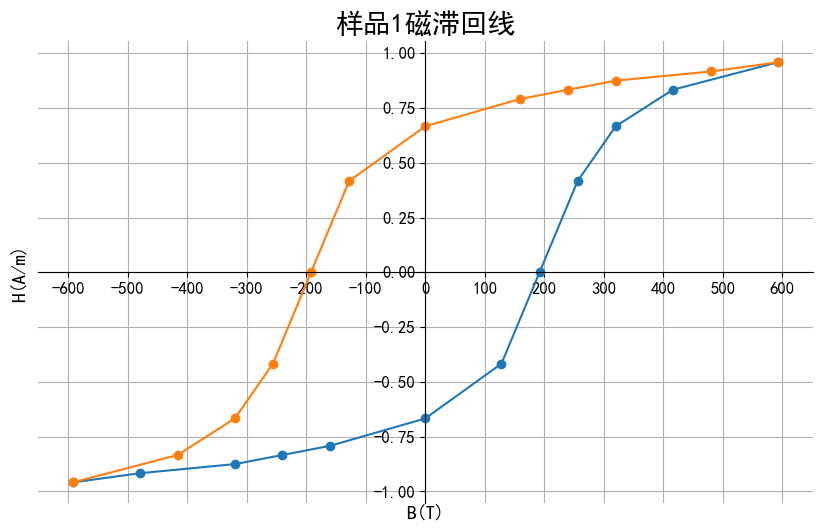

In [2]:
# 样品1磁滞回线

# 生成关于原点中心对称的点
df1_1_sym = pd.DataFrame()
df1_1_sym["H(A/m)"] = -df1_1["H(A/m)"]
df1_1_sym["B(T)"] = -df1_1["B(T)"]

# 样品1磁滞回线
plt.figure(figsize=(10, 6))
plt.plot(df1_1["H(A/m)"], df1_1["B(T)"], label="1_1", marker="o")
plt.plot(df1_1_sym["H(A/m)"], df1_1_sym["B(T)"], label="1_1_sym", marker="o")

# 移动坐标轴到横纵坐标为0处
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x_min = np.floor(min(df1_1["H(A/m)"].min(), df1_1_sym["H(A/m)"].min()) / 100) * 100
x_max = np.ceil(max(df1_1["H(A/m)"].max(), df1_1_sym["H(A/m)"].max()) / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(fontsize=12)
# 设置xlabel和ylabel在图像边缘
# 在代码里H和B的位置是反过来的，这样是为了在图片上显示的时候视觉观感是H在x轴上，B在y轴上
ax.set_xlabel('B(T)', fontsize=14, labelpad=150)
ax.set_ylabel('H(A/m)', fontsize=14, labelpad=250)
plt.title("样品1磁滞回线", fontsize=20)
plt.grid()
plt.savefig(root_address + r"\图\1-样品1磁滞回线.png")

In [3]:
# 计算Bm（B的最大值）
Bm = df1_1_sym["B(T)"].max()

# 计算Br（H为0时的B）
# 找到最接近H=0的索引
Br_index = df1_1_sym["H(A/m)"].sub(0).abs().idxmin()
Br = df1_1_sym.loc[Br_index, "B(T)"]

# 计算Hc（B为0时的H值，再取负）
# 找到最接近B=0的索引
Hc_index = df1_1_sym["B(T)"].sub(0).abs().idxmin()
Hc = -df1_1_sym.loc[Hc_index, "H(A/m)"]

# 确保数据按H(A/m)排序
df1_1_sorted = df1_1.sort_values(by="H(A/m)")
df1_1_sym_sorted = df1_1_sym.sort_values(by="H(A/m)")

# 计算正向曲线的面积
area_positive = simps(df1_1_sorted["B(T)"], df1_1_sorted["H(A/m)"])

# 计算对称曲线的面积
area_negative = simps(df1_1_sym_sorted["B(T)"], df1_1_sym_sorted["H(A/m)"])

# 计算总面积
total_area = area_positive + area_negative

print(f"Bm: {Bm}")
print(f"Br: {Br}")
print(f"Hc: {Hc}")
print(f"WBH: {total_area}")

Bm: 0.9583333333333334
Br: 0.6666666666666666
Hc: 192
WBH: 7.338777127012293


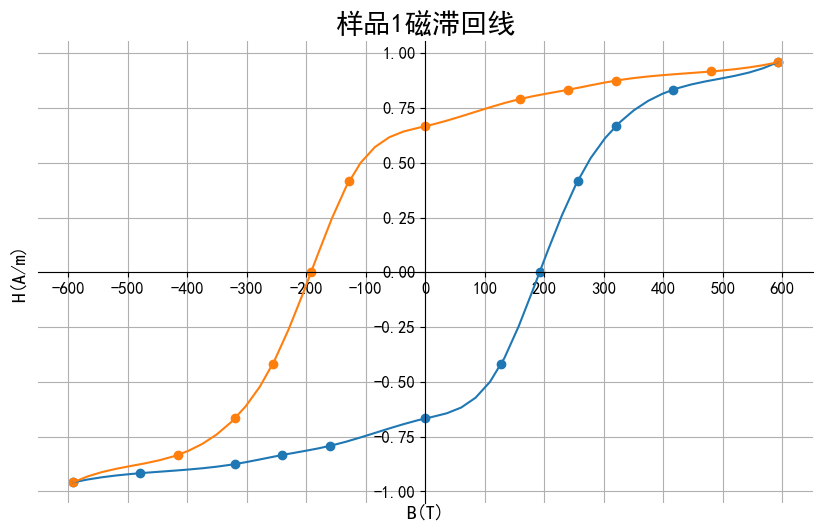

In [4]:
# 生成关于原点中心对称的点
df1_1_sym = pd.DataFrame()
df1_1_sym["H(A/m)"] = -df1_1["H(A/m)"]
df1_1_sym["B(T)"] = -df1_1["B(T)"]

# 对数据进行排序以确保x轴数据是严格递增的序列
df1_1_sorted = df1_1.sort_values(by="H(A/m)")
df1_1_sym_sorted = df1_1_sym.sort_values(by="H(A/m)")

# 样品1磁滞回线
plt.figure(figsize=(10, 6))

# 原始数据点
x = df1_1_sorted["H(A/m)"]
y = df1_1_sorted["B(T)"]
x_sym = df1_1_sym_sorted["H(A/m)"]
y_sym = df1_1_sym_sorted["B(T)"]

# 生成平滑曲线
x_new = np.linspace(x.min(), x.max(), 50)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_new)

x_sym_new = np.linspace(x_sym.min(), x_sym.max(), 50)
spl_sym = make_interp_spline(x_sym, y_sym, k=3)
y_sym_smooth = spl_sym(x_sym_new)

plt.plot(x_new, y_smooth, label="1_1")
plt.plot(x_sym_new, y_sym_smooth, label="1_1_sym")

# 移动坐标轴到横纵坐标为0处
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 设置横坐标刻度更密集并且整齐
x_min = np.floor(min(df1_1["H(A/m)"].min(), df1_1_sym["H(A/m)"].min()) / 100) * 100
x_max = np.ceil(max(df1_1["H(A/m)"].max(), df1_1_sym["H(A/m)"].max()) / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(fontsize=12)

# 设置xlabel和ylabel在图像边缘
# 在代码里H和B的位置是反过来的，这样是为了在图片上显示的时候视觉观感是H在x轴上，B在y轴上
ax.set_xlabel('B(T)', fontsize=14, labelpad=150)
ax.set_ylabel('H(A/m)', fontsize=14, labelpad=250)
plt.title("样品1磁滞回线", fontsize=20)
plt.scatter(x, y)
plt.scatter(x_sym, y_sym)
plt.grid()
plt.show()

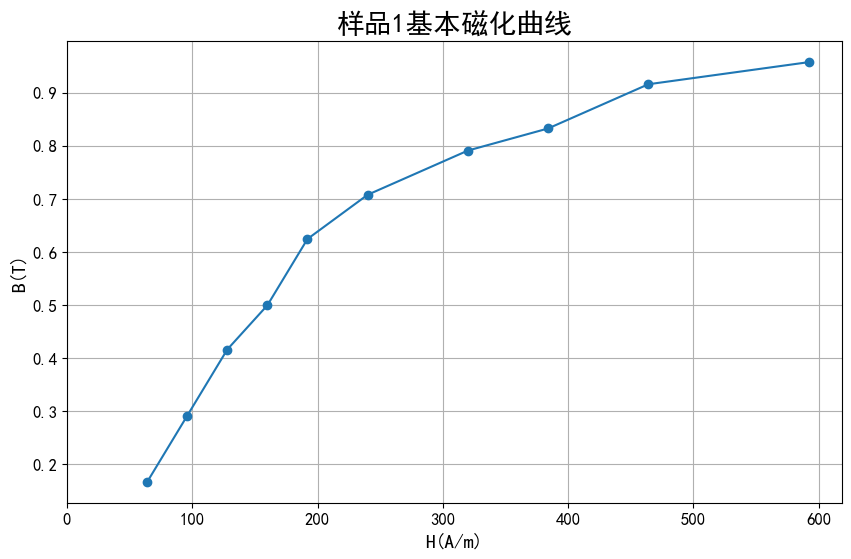

In [5]:
# 样品1基本磁化曲线
plt.figure(figsize=(10, 6))

# 原始数据点
x = df1_2["H(A/m)"]
y = df1_2["B(T)"]

plt.plot(x, y, marker="o")

# 设置横坐标刻度更密集并且整齐
x_min = np.floor(df1_2["H(A/m)"].min() / 100) * 100
x_max = np.ceil(df1_2["H(A/m)"].max() / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('H(A/m)', fontsize=14)
plt.ylabel('B(T)', fontsize=14)
plt.title("样品1基本磁化曲线", fontsize=20)
plt.grid()
plt.savefig(root_address + r"\图\2-样品1基本磁化曲线.png")

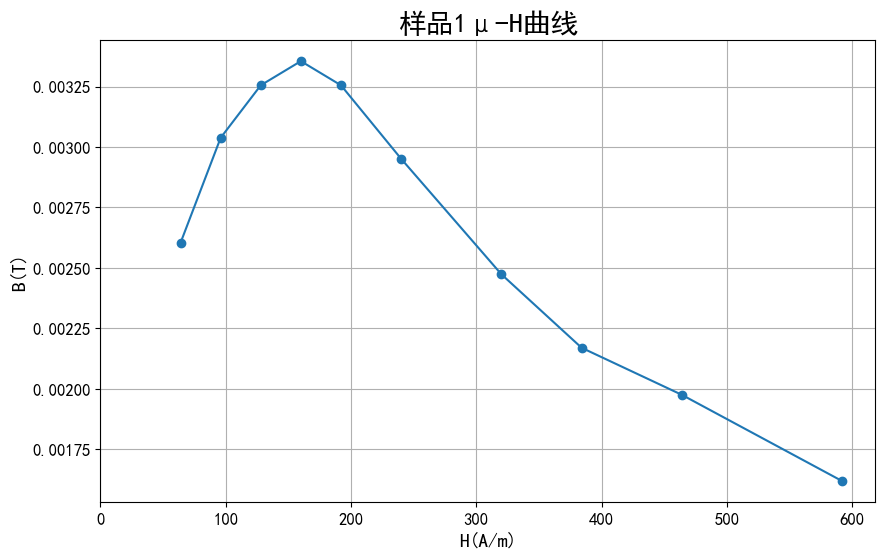

In [6]:
# 样品1μ-H曲线
plt.figure(figsize=(10, 6))

# 原始数据点
x = df1_2["H(A/m)"]
y = df1_2["μ=B/H"]

plt.plot(x, y, marker="o")

# 设置横坐标刻度更密集并且整齐
x_min = np.floor(df1_2["H(A/m)"].min() / 100) * 100
x_max = np.ceil(df1_2["H(A/m)"].max() / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('H(A/m)', fontsize=14)
plt.ylabel('B(T)', fontsize=14)
plt.title("样品1μ-H曲线", fontsize=20)
plt.grid()
plt.savefig(root_address + r"\图\3-样品1μ-H曲线.png")

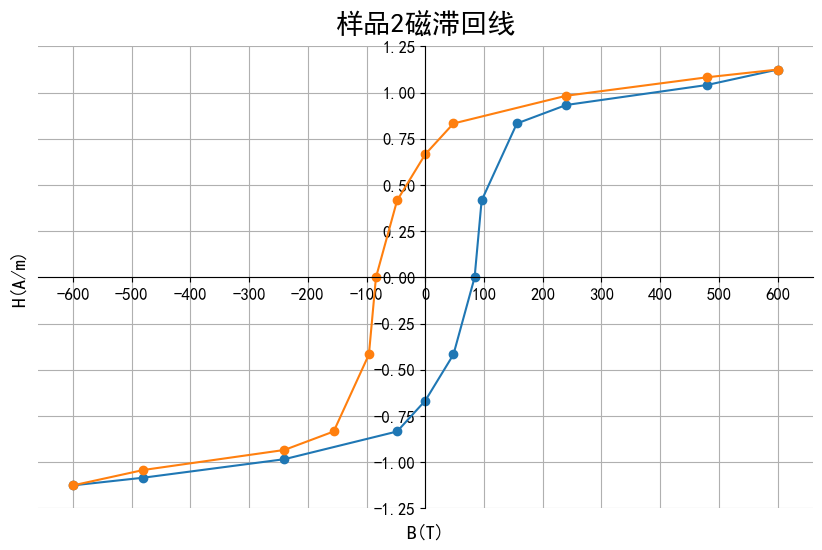

In [7]:
# 样品2磁滞回线

# 生成关于原点中心对称的点
df2_1_sym = pd.DataFrame()
df2_1_sym["H(A/m)"] = -df2_1["H(A/m)"]
df2_1_sym["B(T)"] = -df2_1["B(T)"]

# 样品1磁滞回线
plt.figure(figsize=(10, 6))
plt.plot(df2_1["H(A/m)"], df2_1["B(T)"], label="1_1", marker="o")
plt.plot(df2_1_sym["H(A/m)"], df2_1_sym["B(T)"], label="1_1_sym", marker="o")

# 移动坐标轴到横纵坐标为0处
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x_min = np.floor(min(df2_1["H(A/m)"].min(), df2_1_sym["H(A/m)"].min()) / 100) * 100
x_max = np.ceil(max(df2_1["H(A/m)"].max(), df2_1_sym["H(A/m)"].max()) / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(x_ticks, fontsize=12)

y_min = np.floor(min(df2_1["B(T)"].min(), df2_1_sym["B(T)"].min()) / 0.25) * 0.25
y_max = np.ceil(max(df2_1["B(T)"].max(), df2_1_sym["B(T)"].max()) / 0.25) * 0.25
y_ticks = np.arange(y_min, y_max + 0.25, 0.25)
plt.yticks(y_ticks, fontsize=12)
# 设置xlabel和ylabel在图像边缘
# 在代码里H和B的位置是反过来的，这样是为了在图片上显示的时候视觉观感是H在x轴上，B在y轴上
ax.set_xlabel('B(T)', fontsize=14, labelpad=160)
ax.set_ylabel('H(A/m)', fontsize=14, labelpad=250)
plt.title("样品2磁滞回线", fontsize=20, pad=10)
plt.grid()
plt.savefig(root_address + r"\图\4-样品2磁滞回线.png")

In [8]:
# 计算Bm（B的最大值）
Bm = df2_1_sym["B(T)"].max()

# 计算Br（H为0时的B）
# 找到最接近H=0的索引
Br_index = df2_1_sym["H(A/m)"].sub(0).abs().idxmin()
Br = df2_1_sym.loc[Br_index, "B(T)"]

# 计算Hc（B为0时的H值，再取负）
# 找到最接近B=0的索引
Hc_index = df2_1_sym["B(T)"].sub(0).abs().idxmin()
Hc = -df2_1_sym.loc[Hc_index, "H(A/m)"]

# 确保数据按H(A/m)排序
df2_1_sorted = df2_1.sort_values(by="H(A/m)")
df2_1_sym_sorted = df2_1_sym.sort_values(by="H(A/m)")

# 计算正向曲线的面积
area_positive = simps(df2_1_sorted["B(T)"], df2_1_sorted["H(A/m)"])

# 计算对称曲线的面积
area_negative = simps(df2_1_sym_sorted["B(T)"], df2_1_sym_sorted["H(A/m)"])

# 计算总面积
total_area = area_positive + area_negative

print(f"Bm: {Bm}")
print(f"Br: {Br}")
print(f"Hc: {Hc}")
print(f"WBH: {total_area}")

Bm: 1.125
Br: 0.6666666666666666
Hc: 83.99999999999999
WBH: 7.282579365079272


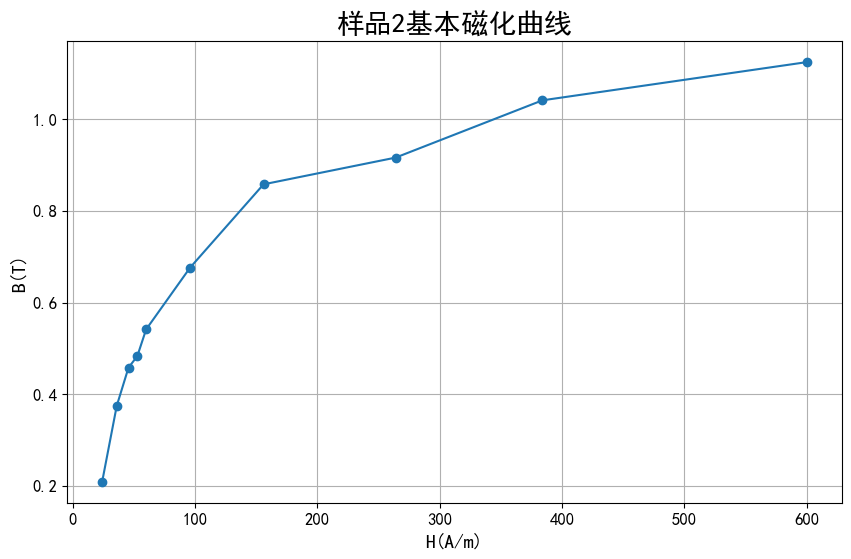

In [9]:
# 样品2基本磁化曲线
plt.figure(figsize=(10, 6))

# 原始数据点
x = df2_2["H(A/m)"]
y = df2_2["B(T)"]

plt.plot(x, y, marker="o")

# 设置横坐标刻度更密集并且整齐
x_min = np.floor(df2_2["H(A/m)"].min() / 100) * 100
x_max = np.ceil(df2_2["H(A/m)"].max() / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('H(A/m)', fontsize=14)
plt.ylabel('B(T)', fontsize=14)
plt.title("样品2基本磁化曲线", fontsize=20)
plt.grid()
plt.savefig(root_address + r"\图\5-样品2基本磁化曲线.png")

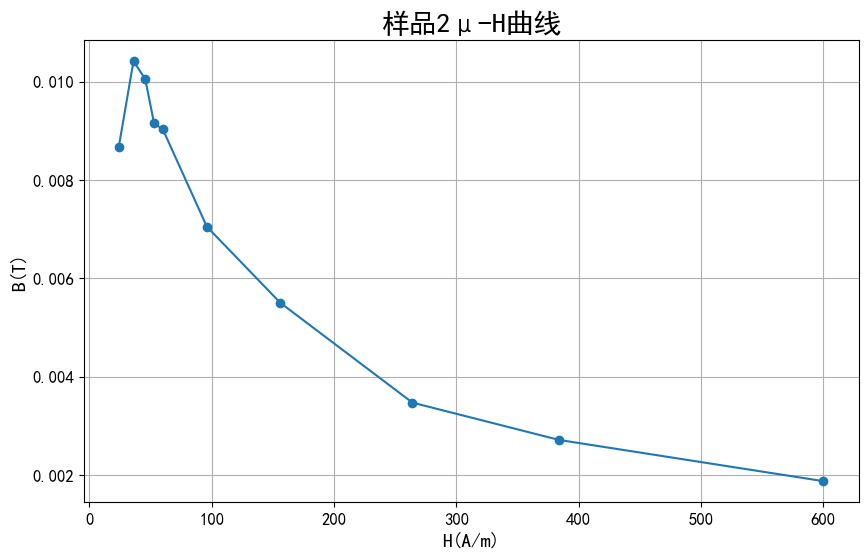

In [10]:
# 样品2μ-H曲线
plt.figure(figsize=(10, 6))

# 原始数据点
x = df2_2["H(A/m)"]
y = df2_2["μ=B/H"]

plt.plot(x, y, marker="o")

# 设置横坐标刻度更密集并且整齐
x_min = np.floor(df2_2["H(A/m)"].min() / 100) * 100
x_max = np.ceil(df2_2["H(A/m)"].max() / 100) * 100
x_ticks = np.arange(x_min, x_max + 100, 100)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('H(A/m)', fontsize=14)
plt.ylabel('B(T)', fontsize=14)
plt.title("样品2μ-H曲线", fontsize=20)
plt.grid()
plt.savefig(root_address + r"\图\6-样品2μ-H曲线.png")